# Lab 2 - Time Domain Filtering
This lab is meant to give you an introduction to working with discrete time
signals and systems and implement some temporal filters in discrete time from
scratch using Python.

**Team Members**: 

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import copy
import pylab as pl
import time as t
import scipy

from IPython import display
from scipy.io import wavfile
from PIL import Image 
from scipy import signal
from scipy.signal import convolve2d

# Task 1: Application of Convolution

What are the coefficients of $f(x)g(x)$?

In [12]:
# 1.1.1
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

p1 = np.polynomial.Polynomial(a)
p2 = np.polynomial.Polynomial(b)
print("The coefficients of the product polynomial are:")
p1 * p2

The coefficients of the product polynomial are:


Polynomial([ 4., 13., 28., 27., 18.], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

In [13]:
# 1.1.2
print("The convolution of a and b is:")
np.convolve(a, b)


The convolution of a and b is:


array([ 4, 13, 28, 27, 18])

The results from polynomial multiplication and convolution are the same

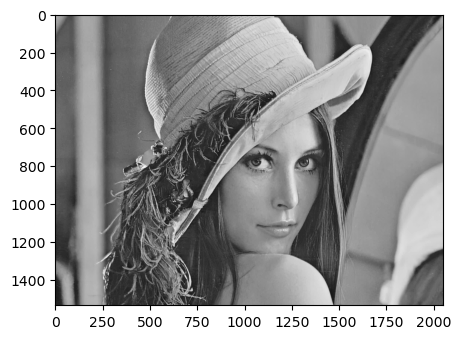

In [3]:
img_gray = Image.open('lenna.jpeg').convert('L')    # Uses standard 8-bit color code (integer)
img_gray = np.array(img_gray)                    # Convert to numpy array

fig = plt.figure(figsize=(5, 5))
_ = plt.imshow(img_gray, cmap ='gray', vmin=0, vmax=255)

In [14]:
kernel_size = 20
smooth_kernel = np.ones((kernel_size, kernel_size)) / kernel_size**2

horiz_edge_kernel = np.array([[-1, -2, -1],
                              [ 0,  0,  0],
                              [ 1,  2,  1]])

vert_edge_kernel = np.array([[-1, 0, 1],
                            [-2, 0, 2],
                            [-1, 0, 1]])

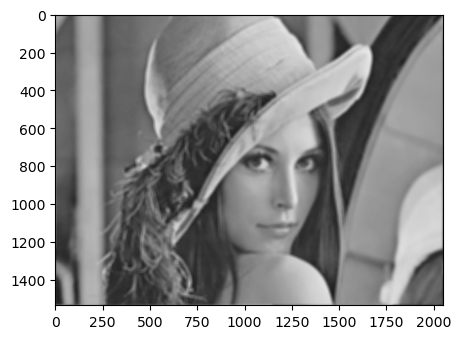

In [17]:
# your code goes here
smoothed_img = convolve2d(img_gray, smooth_kernel, mode='same', boundary='wrap')
fig = plt.figure(figsize=(5, 5))
_ = plt.imshow(smoothed_img, cmap ='gray', vmin=0, vmax=255)

The smooth_kernel decreased the sharpness of the image, resulting in a more blurry version of the same image.

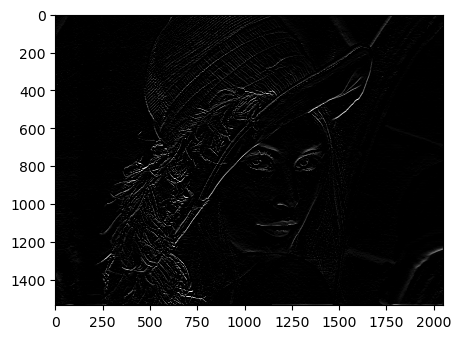

In [18]:
# horizontal edges
horiz_edges = convolve2d(img_gray, horiz_edge_kernel, mode='same', boundary='wrap')
fig = plt.figure(figsize=(5, 5))
_ = plt.imshow(horiz_edges, cmap ='gray', vmin=0, vmax=255)

The horizontal edge kernel showed the contour line of the figure in the image in the horizontal direction. This is edge direction in the horizontal direction

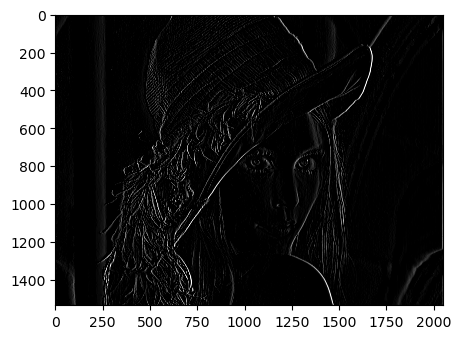

In [19]:
# vertical edges kernel
vert_edges = convolve2d(img_gray, vert_edge_kernel, mode='same', boundary='wrap')
fig = plt.figure(figsize=(5, 5))   
_ = plt.imshow(vert_edges, cmap ='gray', vmin=0, vmax=255)

The vertical edge kernel shows the contour line of the figure in the image in the verticle direction. This is edge detection in the vertical direction

# Task 2: Implementing Discrete Time Filters to Filter Time-Series Data

In this part, we will look at various discrete time filters and how they are used to make more sense of time-series data. These are very common, basic and helpful operations that one encounters in anything related to signal processing.

## 1.1 Implementing a Mean Filter

### n is an array containing integers from -5 to 6 (exclusive) with a step size of 1. 

In [2]:
n = np.arange(-5, 6, 1)
print(n)

[-5 -4 -3 -2 -1  0  1  2  3  4  5]


In [ ]:
# choose relevant parameters
srate = 1000 # sampling rate in Hz
time = np.arange(0, 3, 1/srate) # associated time vector that corresponds to 3 seconds
n = len(time) # length of the time vector
p = 15 # poles for random interpolation
pi = np.pi # value of pi
sigamp1 = 30 # amplitude of base signal 1
sigamp2 = 5 # amplitude of base signal 2

# here are some base signals to work with
base1 = np.interp(np.linspace(0,p,n),np.arange(0,p),np.random.rand(p)*sigamp1)
# np.interp(x, xp, fp)
# Returns the one-dimensional piecewise linear interpolant to a function with given discrete data points (xp, fp), evaluated at x.

base2 = 5*np.sin(2*pi*sigamp2*time)

In [11]:
#TO DO: plot base signals

In [ ]:
# create some random noise to be added to the above base signals

noise = # TO DO: create some random noise

# add noise to the base signals to create new noisy signals
signal1 = base1 + noise
signal2 = base2 + noise

In [ ]:
# implement the running mean filter

filtsig1 = np.zeros(n) # initialize filtered signal vector for signal 1
filtsig2 = np.zeros(n) # initialize filtered signal vector for signal 2

#TO DO: finish your implementation of the running mean filter

# compute the time window size in ms and print it
windowsize = # TO DO: compute the duration of the time-window that 

# slides across the signal in ms
print("The time window size used was ", windowsize, "ms")

In [ ]:
# TO DO: plot the required plots
# Note: Make sure to add titles and labels as needeD

# For base signal 1:
# In a single plot and three subplots, plot the original signal, noisy signal and 
# filtered signal overliad on the noisy signal to see the difference

# For base signal 2:
# In a single plot and three subplots, plot the original signal, noisy signal and 
# filtered signal overliad on the noisy signal to see the difference

## Discussion

**Comment on how the results and plots change when you amplify the noise more and also change the value of k.**




**Mention and explain any ONE of many possible drawbacks of the mean filter in analysing noisy time-series?**



## 1.2 Implementing a Median Filter to Remove Spikes

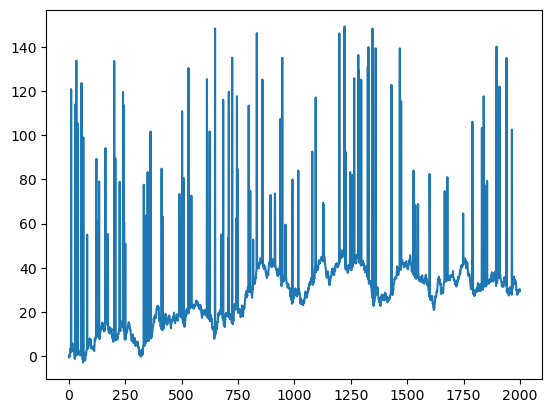

In [12]:
# create signal
n = 2000
# np.cumsum calculates the cumulative sum of elements along a given axis. 
# signal array represents the cumulative sum of the random values
signal = np.cumsum(np.random.randn(n))

# proportion of time points to replace with noise
propnoise = .05

# find noise points
noisepnts = np.random.permutation(n)
noisepnts = noisepnts[0:int(n*propnoise)]

# generate signal and replace points with noise
signal[noisepnts] = 50+np.random.rand(len(noisepnts))*100

fig3=plt.figure(3)
plt.plot(range(0,n),signal)

In [ ]:
# use hist to pick threshold


# visual-picked threshold
threshold =


# find data values above the threshold
suprathresh = 

# initialize filtered signal
filtsig = copy.deepcopy(signal)

# loop through suprathreshold points and set to median of k
k = 20 # actual window is k*2+1
for ti in range(0, len(suprathresh)):
    # TO DO : finish the for loop to apply the median filter
    # lower and upper bounds
    # compute median of surrounding points

# TO DO: plot your results as directed

## Discussion

**Compare the mean and median filters in terms of their uses and one advantage and disadvantage one has over the other.**

## Task 3: Denoising an EMG signal

In [ ]:
# import data
emgdata = scipy.io.loadmat('EMG.mat')

# extract needed variables
emgtime = emgdata['emgtime'][0]
emg  = emgdata['emg'][0]

# initialize filtered signal
emgf = copy.deepcopy(emg) # this is where the result of 
# the TKEO algorithm should be stored

# apply the TKEO algorithm

# TO DO: You can implement this with a for loop or use a vectorized approach 

## convert both signals to zscore

# find timepoint zero
time0 = # TO DO: np.argmin() can come in handy
print(time0_index)

# convert original EMG to z-score from time-zero
emgZ = # TO DO:subtract the mean of the emg signal from 0 to time0 from the original emg
# and divide that by the standard deviation of the signal from 0 to time0

# same for filtered EMG energy
emgZf = # TO DO: Repeat for the filtered signal


# TO DO: plot your results as directed



## Discussion

**How would the other two filters implemented, i.e, the running mean and median filters fare against the TKEO method in analysing the EMG signal in this fashion?**



**If you had to use a running mean filter or a median filter to analyse the EMG signal to detect muscle activity, which one would you prefer and why?**

